# Exercise 3

## Parametric Types

* Revise your code from the last exercise (or the solutions we provided) to include parametric types. Test that it still works by integrating one trajectory. 

In [ ]:
import DifferentialEquations: solve # we have to import this because we want to use the solve from this library later as well 

abstract type AbstractDEProblem{T} end
abstract type AbstractSolver{T} end 

struct MyODEProblem{S,T,U,M,N} <: AbstractDEProblem{T}
    f::S 
    x0::AbstractArray{T,N} # we could also just do x0::T, but in this way we still enforce that it is an array
    tspan::U 
    Θ::AbstractArray{T,M} # similarly, we could also just do Θ::M. Doing it like this also enforces that x0 and Θ have the same element type
end

struct SimpleEulerSolver{T} <: AbstractSolver{T}
    Δt::T
end 

function solve(prob::MyODEProblem{S,T,U,M,N}, alg::SimpleEulerSolver{T}) where {S,T,U,M,N} # when we write it like this we enforce that `MyODEProblem` and `SimpleEulerSolver` have the same parameter type
    x0 = prob.x0 
    Δt = alg.Δt

    t = T(prob.tspan[1]):Δt:T(prob.tspan[2]) # we can also use `T` here, to make sure that the time axis is of the same type

    x = zeros(T, size(prob.x0)..., length(t)) # similarly T can be an argument for the allocation 
    x[:,1] = x0

    for i ∈ 2:length(t) # the simple Euler Loop
        x[:,i] = x[:,i-1] + Δt .* prob.f(x[:,i-1], prob.Θ, t[i]) 
    end

    t, x 
end

struct ImprovedEulerSolver{T} <: AbstractSolver{T}
    Δt::T
end 

function solve(prob::MyODEProblem{S,T,U,M,N}, alg::ImprovedEulerSolver{T}) where {S,T,U,M,N} 
    x0 = prob.x0 
    Δt = alg.Δt

    t = T(prob.tspan[1]):Δt:T(prob.tspan[2]) 

    x = zeros(T, size(prob.x0)..., length(t))
    x[:,1] = x0 

    for i ∈ 2:length(t) 
        x_trial = x[:,i-1] + Δt * prob.f(x[:,i-1], prob.Θ, t[i]) 
        x[:,i] = x[:,i-1] + 0.5 * (prob.f(x[:,i-1], prob.Θ, t[i]) + prob.f(x_trial, prob.Θ, t[i])) * alg.Δt 
    end

    t, x 
end

function lotka_volterra(x,p,t)
    α, β, γ, δ = p 
    [α*x[1] - β*x[1]*x[2], -γ*x[2] + δ*x[1]*x[2]]
end

α = 1.
β = 0.5
γ = 1.
δ = 0.2
p = [α, β, γ, δ] 
tspan = (0.,50.)

x0 = [20., 5.] 

prob = MyODEProblem(lotka_volterra, x0, tspan, p) 

t2, sol2 = solve(prob, ImprovedEulerSolver(Δt))

plot(t2, transpose(sol2), xlabel="t", ylabel="Population")


## DifferentialEquations.jl 

* Similar to the notes in the lecture, integrate the Lotka Volterra system with `DifferentialEquations.jl`. 
* Try out different solvers like `Tsit5()`, `Vern8()`, `Rosenbrock23()` and plot their solution. For a system as "easy" as the LV, you will probably not see large differences in accuracy, but note and compare their different performance with `@btime` from `BenchmarkTools.jl`. Also experiment with how the adaptive stepsize tolerances like `reltol` (default: $10^{-3}$) and `abstol` (default: $10^{-6}$) influence the performance of the solver 


* `Tsit5()` is one of the default solvers of DifferentialEquations.jl, it is a Runge-Kutta solver with 5th-order accuracy and adaptive stepsize. It's a good default choice
* `Vern8()` is also a adaptive stepsize Runge-Kutta solver, but with 8th-order accuracy. Thus it is more accurate but slower than the `Tsit5()`
* `Rosenbrock23()` is a different kind of solver. It is an implicit solver that is different to the explicit Runge-Kutta and Euler solvers we talked about. It is setup to deal with "stiff" ODEs. Stiff ODEs are numerically harder to solve. They occur e.g. when there is a large difference in scale between the different dimensions of a system/model. They can also solve non-stiff ODEs, but generally they are slower than the explicit solvers for these cases (for a similar accuracy). 


## Stability of a Double Well 

Explore the stability of the system $$\frac{dx}{dt} = x - x^3.$$ What are the fixed points of the system and what's their stability? Which intervals of initial conditions lead to which of the stable fixed points?



The system has three fixed points an $x_{*1}=-1$, $x_{*2}=0$, $x_{*3}=1$. $x_{*1}$ and $x_{*3}$ are stable and $x_{*2}$ is unstable.

This ODE is also connected to a double well potential $V=-\frac{1}{2}x^2 + \frac{1}{4}x^4 +C$, and $\frac{dx}{dt} = f(x)= -\frac{dV}{dx}$. When we can write an ODE like this, we can also inspect this potential $V$. Trajectories / "Particles" always move towards minima of the potential. This also showcases very well that this is a bistable system. Initial conditions $x_0<0$ always move towards the minima at -1 wheareas initial conditions $x_0>0$ move towards the minima at +1. 

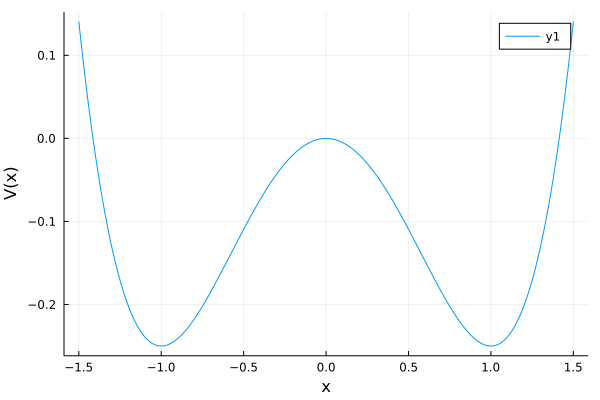

In [2]:
using Plots
plot(x->-0.5x^2 + 0.25x^4, xlims=[-1.5,1.5], ylabel="V(x)", xlabel="x")

## Git 

Remember to commit and push your code to your Git repository that you created last time! 